<a href="https://colab.research.google.com/github/DarkSting/machine_learning_helper_functions/blob/main/helper_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import zipfile

In [13]:
def plot_image(target_folder,target_class):
  """
  returns and plot a random image from the given directory

  Args
  targert_folder : food_vision/test
  target_class : spaghetti_carbonara

  example use of the function
  plot_image(target_folder="food_vision/test",target_class="spaghetti_carbonara")

  """
  target_file = os.path.join(target_folder,target_class)
  random_image = random.sample(os.listdir(target_file),1)
  img = mpimg.imread(os.path.join(target_file,random_image[0]))

  plt.figure(figsize=(15,15))
  plt.imshow(img)
  plt.axis("off")

  return img


In [14]:
def plot_loss_curve(history):

  """
  plots the training accuracy, training loss and validation accuracy and validation loss

  example use of the function
  plot_loss_curve(model_history)

  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['accuracy']))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


In [15]:
def walk_through_dir(dir_path):

  """
  walks through the all directories given folder path

  """
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories in {dir_path}")

In [16]:
def list_down_filenames(target_folder):

  """
  listdown all the filenames inside a folder

  """
  file_names = os.listdir(target_folder)
  print(f"there are {len(file_names)}")
  print(file_names)

In [18]:
def unzip_data(zip_name):

  """
  unzips the files in a zip file read only
  """
  zip_ref = zipfile.ZipFile(zip_name,"r")
  zip_ref.extractall()
  zip_ref.close()


In [19]:
import tensorflow as tf

In [24]:
import requests

In [31]:
def load_image_from_a_location(target_location,is_network=False,image_size=224,is_scaled=False):
  """
  returns a resized image from a given location

  Args
  target_location : network or local path to the image
  image_size : specify the expected resize of the image
  is_scaled : normalize the image between 0 and 1

  example use of the function

  load_image_from_a_location(target_location="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f)

  """

  if target_location.startswith("http"):
        # If it's a URL, download the image using requests
    try:
      response = requests.get(target_location, stream=True)
      response.raise_for_status()  # Raise an exception for bad responses
      target_image = tf.image.decode_jpeg(response.content)  # Decode the JPEG content
    except Exception as e:
      print(f"Error downloading image from {target_location}: {e}")
      return None

  else:
    target_image = tf.io.read_file(target_location)
    target_image = tf.image.decode_image(target_image)

        # If it's a local path, use tf.io.read_file

  plt.figure(figsize=(10,10))
  plt.imshow(target_image)
  plt.axis("off")

  target_image = tf.image.resize(target_image,size=[image_size,image_size])

  if is_scaled:
    return target_image/255
  else:
    return target_image


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.        , 0.02352941, 0.09411765],
        [0.        , 0.02352941, 0.09411765],
        [0.        , 0.02352941, 0.09411765]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.        , 0.02352941, 0.09411765],
        [0.        , 0.02352941, 0.09411765],
        [0.        , 0.02352941, 0.09411765]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.        , 0.02352941, 0.09411765],
        [0.        , 0.02352941, 0.09411765],
        [0.        , 0.02352941, 0.09411765]],

       ...,

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01

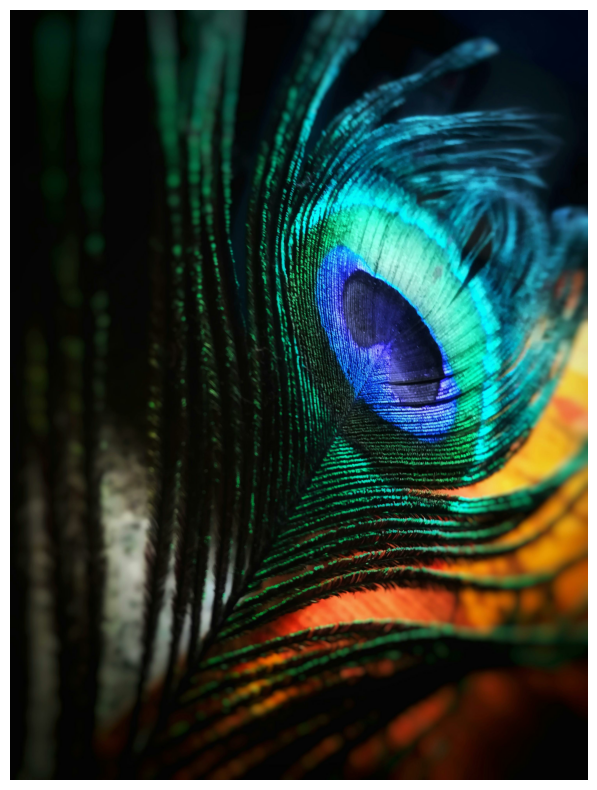

In [33]:
load_image_from_a_location(target_location='https://images.pexels.com/photos/674010/pexels-photo-674010.jpeg?cs=srgb&dl=pexels-anjana-c-169994-674010.jpg&fm=jpg',is_scaled=True)